# **PCA and t-SNE Project: Auto MPG**

# **Marks: 30**

Welcome to the project on PCA and t-SNE. In this project, we will be using the **auto-mpg dataset**.


-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset** 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### **Loading the data**

In [95]:
# Read csv file as DataFrame.
data = pd.read_csv("auto-mpg.csv")

### **Data Overview**

**Observations**
- There are 398 observations and 8 columns.
- Horsepower and car name's datatype is object, and the other six's are numerical.
- There are 305 unique car names (396 unique car name/model + year); there are no duplicated observations.

**Sanity checks**
- Horsepower should be numerical data.
- Each observation represents a different car. Cars with the same name have different parameters.

In [97]:
# Show the first five observations.
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [98]:
# Show the last five observations.
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,chevy s-10


In [99]:
# Show the dimension of data.
data.shape

(398, 8)

In [100]:
# Get data info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [101]:
# Count unique values under each column.
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
car name        305
dtype: int64

In [102]:
# Check if the observations are duplicated.
data[data.duplicated()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name


In a nutshell, **there is no duplicated observations**, and the data is good to go. An unique observation is represented by a combination of parameters, such as car name, model year, etc.

## **Data Preprocessing and Exploratory Data Analysis**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- Missing value treatment
- Feature engineering (if needed)
- Check the correlation among the variables
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



### **Data Preprocessing**

#### **Drop non-numerical data.**

In [107]:
# Create a copy of the data to avoid losing the original data.
data_copy = data.copy()
# Drop the column 'car name'.
data = data.drop(['car name'], axis = 1)

#### **Exam horsepower data, and find why it is not listed as numerical value.**

In [109]:
# Check if each value consists of digits. Those values are essentially numerical because they could be converted to numerical values.
is_digit = pd.DataFrame(data.horsepower.str.isdigit())
# Show all non-numerical values.
data[is_digit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
There are **six** observations that has "?" as horsepower. They should be considered as np.nan.

In [111]:
# Replace ? with np.nan
data = data.replace('?', np.nan)
data[is_digit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [112]:
# Impute the missing values with the median value of the column horsepower.
data.horsepower.fillna(data.horsepower.median(), inplace = True)
# Convert the horsepower column from object data type to float.
data['horsepower'] = data['horsepower'].astype('float64')

### **Summary Statistics**

In [114]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


mpg
Skew : 0.46


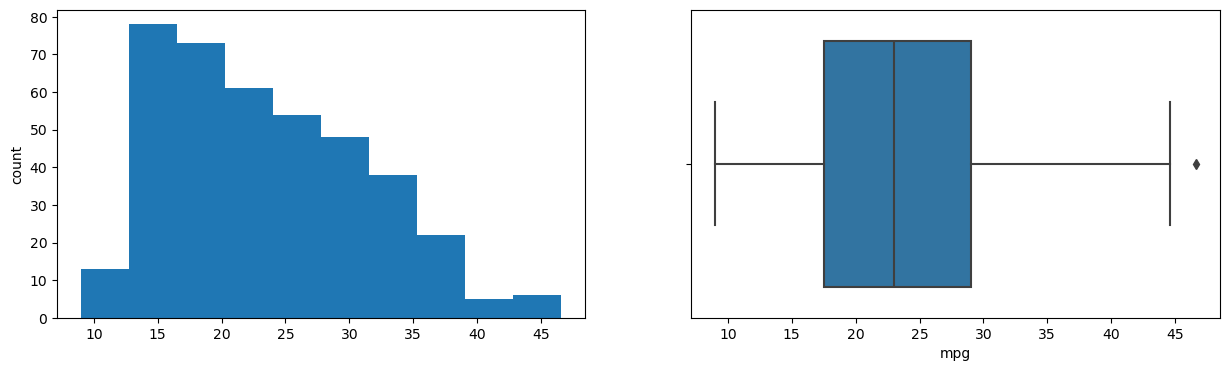

cylinders
Skew : 0.53


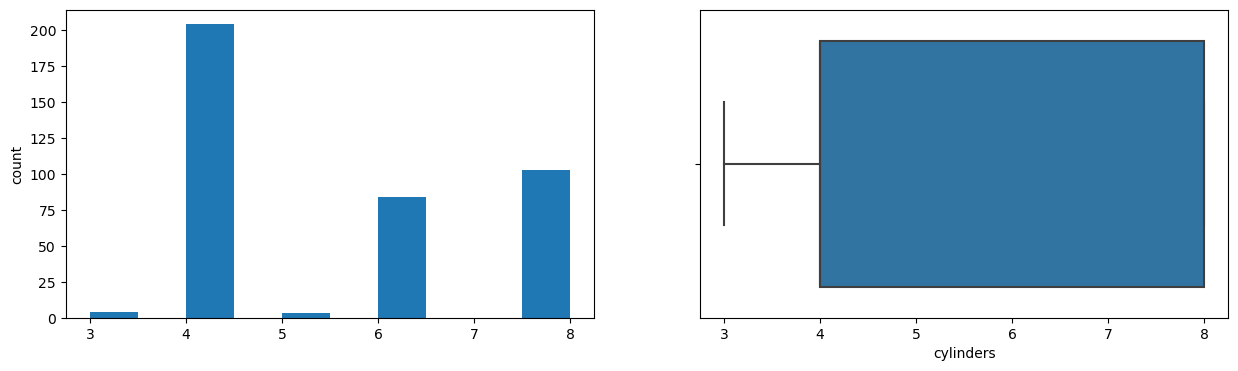

displacement
Skew : 0.72


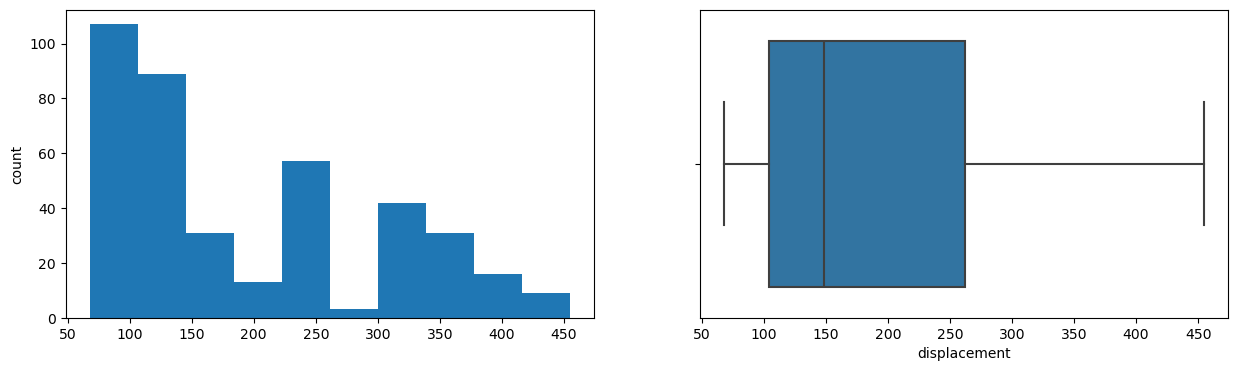

horsepower
Skew : 1.11


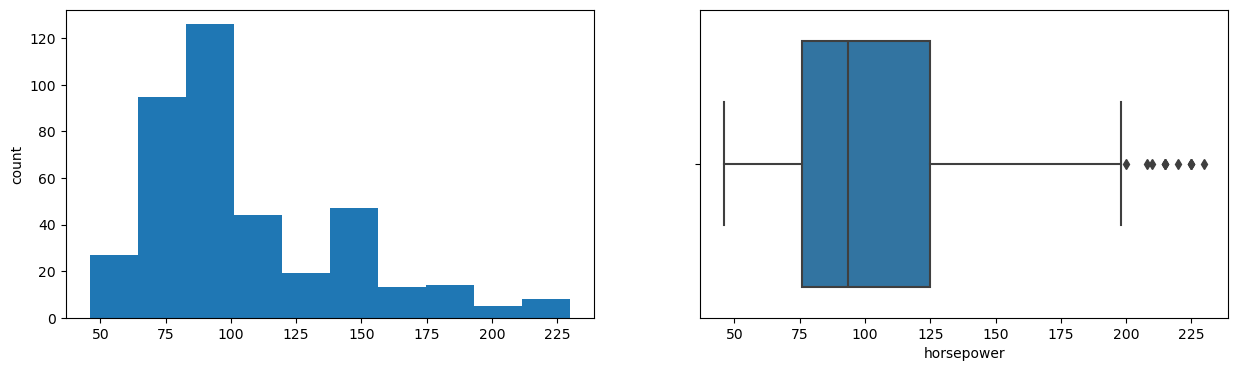

weight
Skew : 0.53


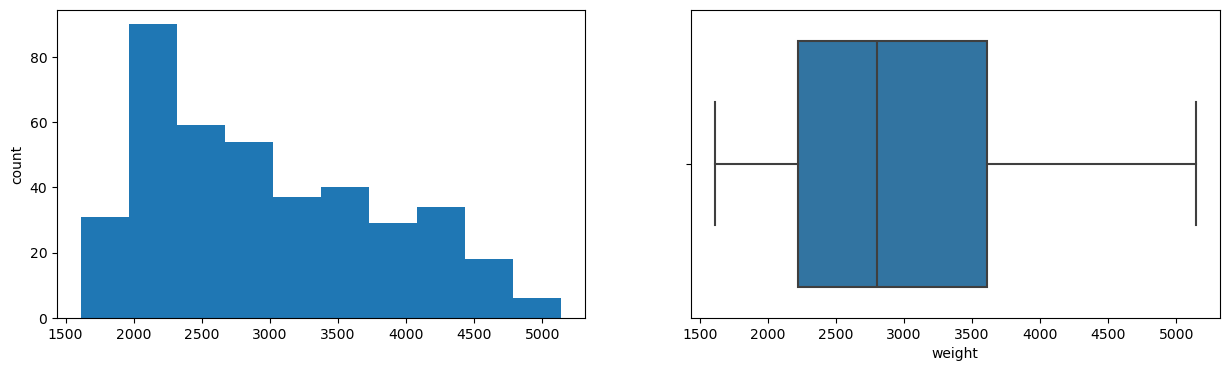

acceleration
Skew : 0.28


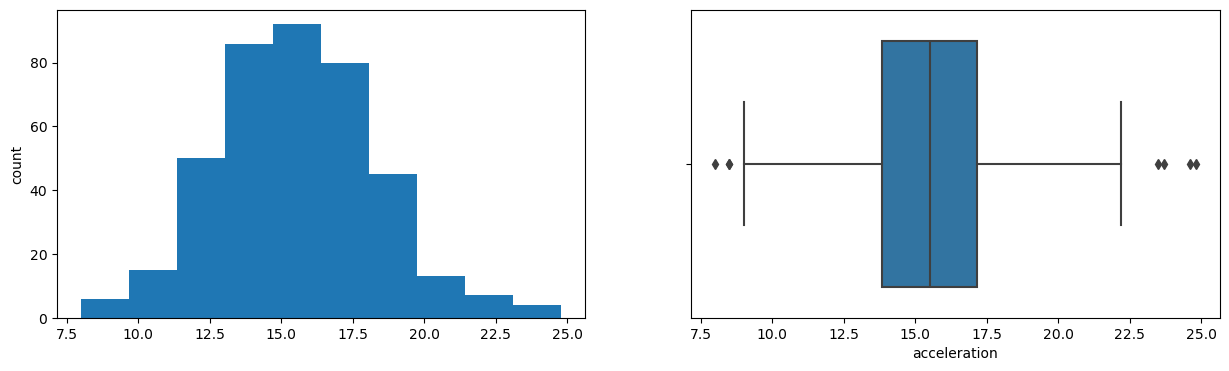

model year
Skew : 0.01


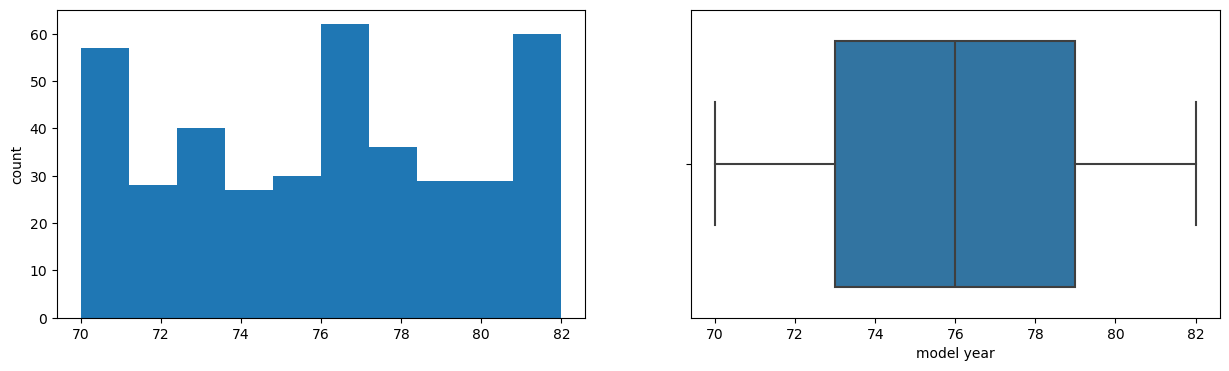

In [115]:
# Plot every column.
for col in data.columns:
    # Show which column is plotted.
    print(col)
    # Calculate skewness.
    print('Skew :',round(data[col].skew(),2))
    # Set figure size.
    plt.figure(figsize = (15, 4))
    # Set subplot on the left.
    plt.subplot(1, 2, 1)
    # Plot histogram.
    data[col].hist(bins = 10, grid = False)
    # Label y-axis.
    plt.ylabel('count')
    # Set subplot on the right.
    plt.subplot(1, 2, 2)
    # Plot boxplot.
    sns.boxplot(x = data[col])
    # Display the plots.
    plt.show()

**Observations:**

mpg is relatively evenly distributed, with outliers. The mpg is generally and evenly designed with different car models.

cylinders is slightly right skewed, and most cars have four cylinders.

displacement is right skewed, with most cars having smaller total cylinder volume.

horsepower is right skewed, with a few outliers. Most cars have lower horsepower.

weight is slightly right skewed. However, the majority have lower weight.

acceleration is evenly distributed, with a few outliers.

model year is evenly distributed.

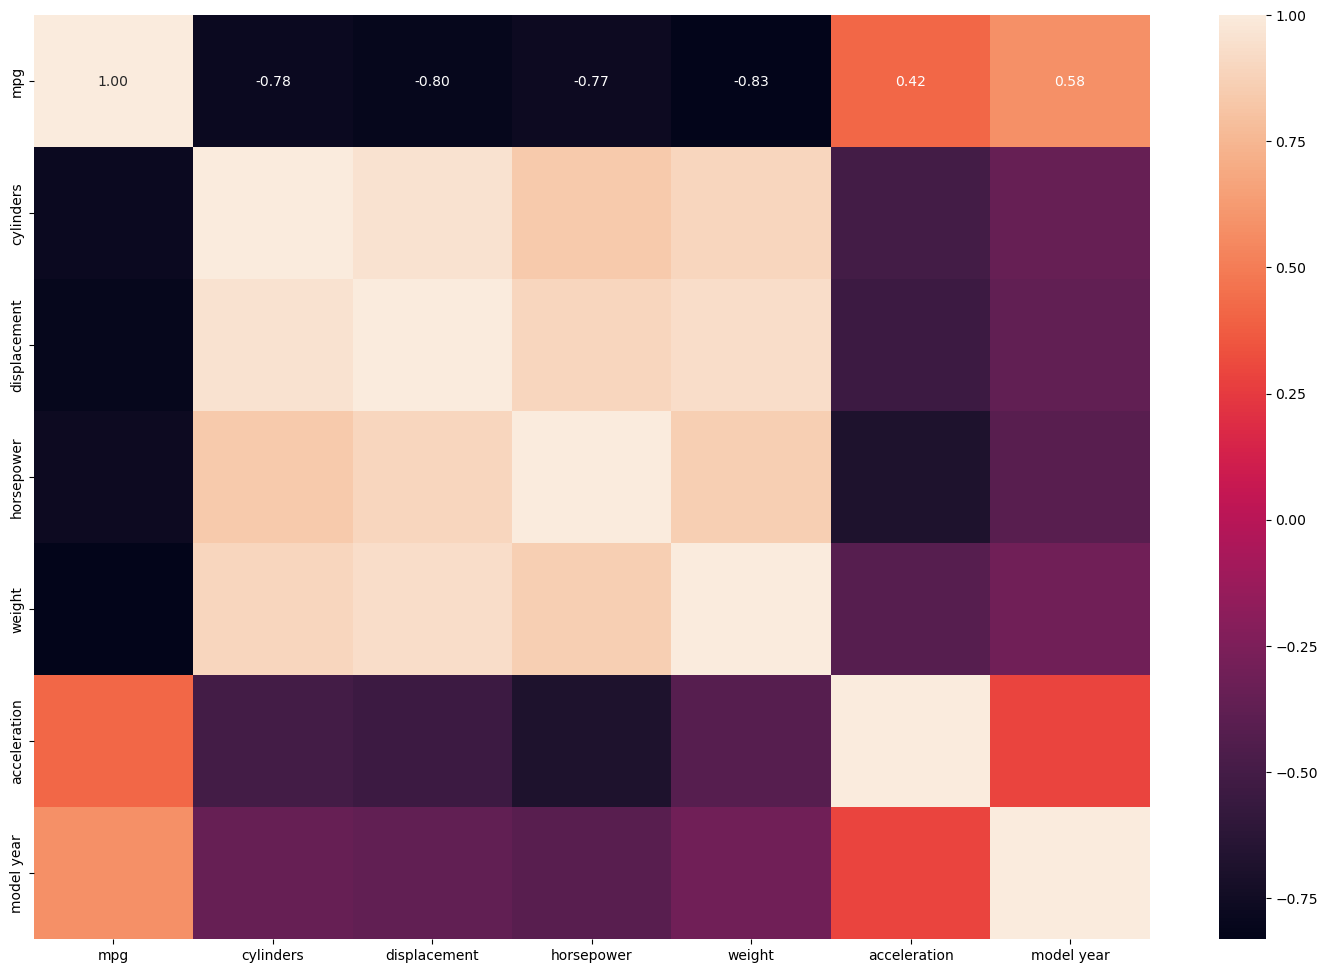

In [117]:
# Set figure size.
plt.figure(figsize=(18, 12))
# Draw a heatmap of the columns correlation to each other.
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='0.2f')
# Display the plots.
plt.show()

**Observations:**

- We can see a **high positive correlation** among the following variables:
  1. cylinders - displacement
  2. cylinders - horsepower
  3. cylinders - weight
  4. displacement - horsepower
  5. displacement - weight
  6. horsepower - weight.
<br/>   
- We can see a **high negative correlation** among the following variables:
  1. mpg - cylinders
  2. mpg - displacement
  3. mpg - horsepower
  4. mpg - weight
  5. acceleration - cylinders
  6. acceleration - displacement
  7. acceleration - horsepower
  8. acceleration - weight
  9. model year - cylinders
  10. model year - displacement
  11. model year - horsepower
  12. model year - weight
<br/>

- cylinders, displacement, horsepower, and weight have a high positive correlation with each other. It makes sense because more cylinders will increase displacement and weight and they provide higher horsepower. And vice versa.
- mpg, acceleration, and model year have a high negative correlation with each of cylinders, displacement, horsepower, and weight. The heavier the vehicle is, the more gas is needed (lower mpg); the heavier the vehicle is, the harder it accelerates (lower acceleration). Model year's negative correlation is not technical, but indicates the trend of vehicle manufacturing over the year.

### **Scaling the data**

In [120]:
# Set scaler.
scaler = StandardScaler()
# Scale the data.
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
# Show the first five observations.
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## **Principal Component Analysis**

### **Get principle components**

In [183]:
# Define the number of principal components to generate 
n = data_scaled.shape[1]
# Find principal components for the data.
pca = PCA(n_components = n, random_state = 1)
# Fit and transform the pca function on scaled data.
data_pca = pd.DataFrame(pca.fit_transform(data_scaled))
# Calculate the percentage of variance explained by each principal component.
exp_var = pca.explained_variance_ratio_

### **Visualize the explained variance by individual components.**

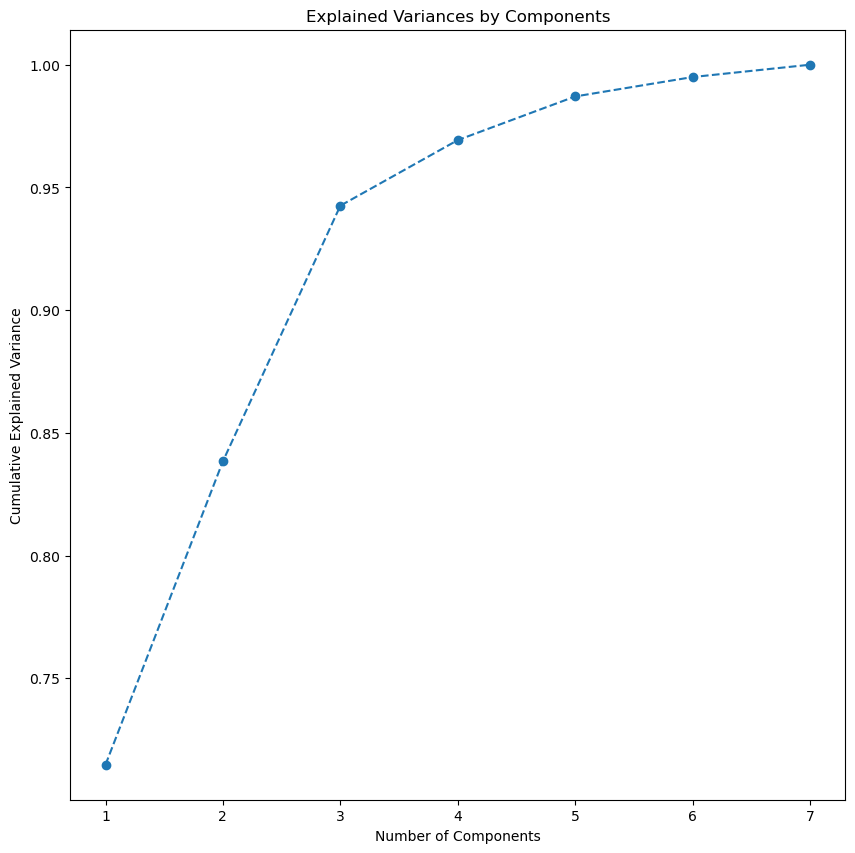

In [125]:
# Set figure size.
plt.figure(figsize = (10, 10))
# Draw the plot.
plt.plot(range(1, n+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
# Name the chart title.
plt.title("Explained Variances by Components")
# Label x-axis.
plt.xlabel("Number of Components")
# Label y-axis.
plt.ylabel("Cumulative Explained Variance")
# Display the plot.
plt.show()

**Observations: Number of PCs that best explain the data: 3**

### **Find the least number of components that can explain more than 70% variance**

In [128]:
# Initialize the sum of variance as 0.
sum = 0
# Get each pc and its variance.
for ix, i in enumerate(exp_var):
    # Take culmulative sum of the variance.
    sum = sum + i
    # Check if the sum is more than 70%.
    if(sum>0.70):
        # Print PC number.
        print("Number of PCs that explain at least 70% variance:", ix + 1)
        # Stop taking the sum.
        break

Number of PCs that explain at least 70% variance: 1


**Observations: Number of PCs that explain at least 70% variance: 1**

### **Interpret the coefficients of the first three principal components from the below DataFrame**

In [131]:
# Name the columns by principle components.
pc_col = ['PC1', 'PC2', 'PC3']
# Make a DataFrame of the first three PCs and their coefficient.
pca_coeff = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_col, columns = data_scaled.columns)

def color_high(val):
    """
    Visualize high and low coefficients of PCs.
    
    Parameters
    ----------
    val : float
        Coefficient of PC.

    Returns
    -------
    str
        background color.
    
    """
    # Highly negative coefficient.
    if val <= -0.40:
        # Mark its cell as pink.
        return 'background: pink'
    # Highly positive coefficient.
    elif val >= 0.40:
        # Mark its cell as skyblue.
        return 'background: skyblue'   

# Apply coloration to the PC DataFrame.
pca_coeff.T.style.applymap(color_high)

/var/folders/59/zf38w4516fx1wscltrv8_b9w0000gn/T/ipykernel_10519/480458389.py:31: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  pca_coeff.T.style.applymap(color_high)


,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:**

- PC1 seems to be related to mpg, cylinders, displacement, horsepower, and weight.
- PC2 seems to be related to model year.
- PC3 seems to be related to acceleration.

#### **Visualize the data in 2-dimension using the first two principal components**



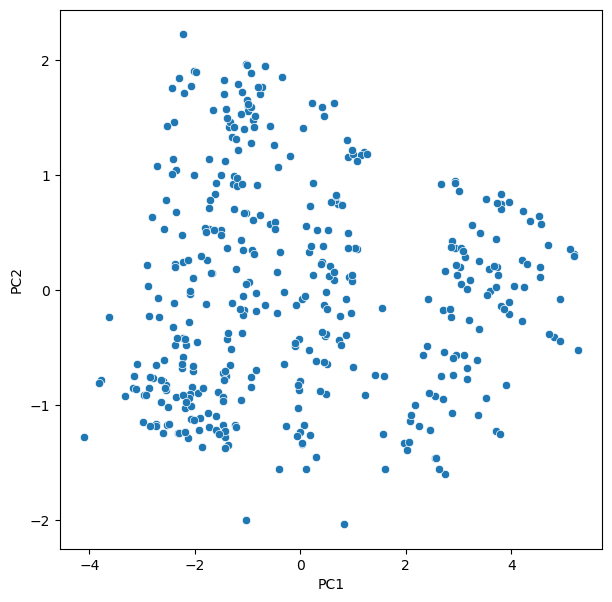

In [134]:
# Set figure size.
plt.figure(figsize = (7, 7))
# Draw a scatterplot of the first two PCs.
sns.scatterplot(x = data_pca[0], y = data_pca[1])
# Label x-axis.
plt.xlabel("PC1")
# Label y-axis.
plt.ylabel("PC2")
# Display the plot.
plt.show()

**Observations: the data vaguely seems to be separated in five groups.** Try to add hue to the plot.

#### **Add hue to the scatter plot.**

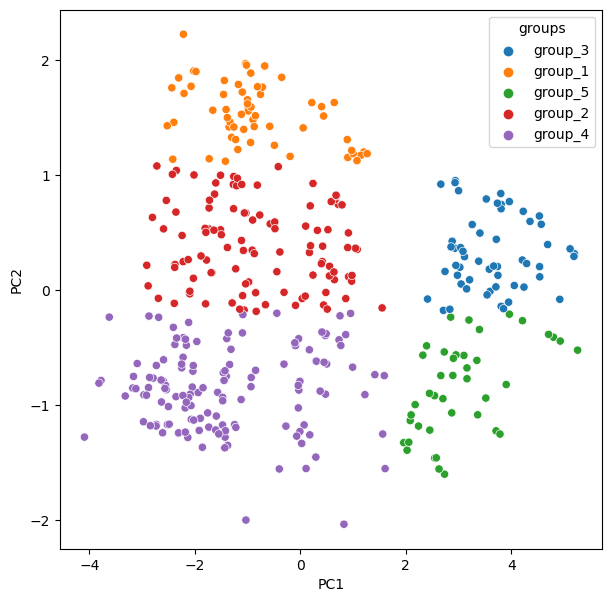

In [137]:
def group_pca(x):
    """
    Group the scattered data points by visual separation along x and y axes.

    Parameters
    ----------
    x : pandas.core.series.Series
        PCA data set.

    Returns
    -------
    str
        group_[number].

    """
    # Subtract the first two PCs.
    first_component = x[0]
    second_component = x[1]
    # First, group the top data points (PC2 > 1.1).
    if second_component > 1.1:
        return 'group_1'
    # Second, group the middle left data points (-0.2 < PC2 < 1.1, PC1 < 1.9).
    elif (second_component > -0.2) and (first_component < 1.9): 
        return 'group_2'
    # Third, group the middle right data points (-0.2 < PC2 < 1.1, PC1 > 1.9).
    elif (second_component > -0.2) and (first_component > 1.9):
        return 'group_3'
    # Forth, group the bottom left data points (PC2 < -0.2, PC1 < 1.9). 
    elif (second_component < -0.2) and (first_component < 1.9):
        return 'group_4'
    # Fifth, group the bottom right data points (PC2 < -0.2, PC1 > 1.9). 
    else: 
        return 'group_5'

# Apply the group function to PCA data set.
data_pca['groups'] = data_pca.apply(group_pca, axis = 1)
# Set figure size.
plt.figure(figsize = (7, 7))
# Draw a scatter plot for two components with hue.
sns.scatterplot(x = 0, y = 1, data = data_pca, hue = 'groups')
# Label x-axis.
plt.xlabel("PC1")
# Label y-axis.
plt.ylabel("PC2")
# Display the plot.
plt.show()

#### **Count for each group**

In [139]:
data_pca['groups'].value_counts()

groups
group_4    135
group_2    106
group_1     61
group_3     55
group_5     41
Name: count, dtype: int64

**Observations:**

- There are five in the data. Each group has a different set of characteristics.
- Group 1 represents older car models with lower performance (cylinder number).
- Group 2 represents mid-generation car models with lower performance.
- Group 3 represents mid-generation car models with higher performance.
- Group 4 represents newer car models with lower performance.
- Group 5 represents newer car models with higher performance.
- Group 2 and 4 have the most sales. Customers have a lower demand for car performance. This implies customers prefer economic cars. And they prefer newer models. This likely implies newer models have more modern features. **So the retailer should focus on newer economic (lower performance requirement) models**

## **t-SNE**

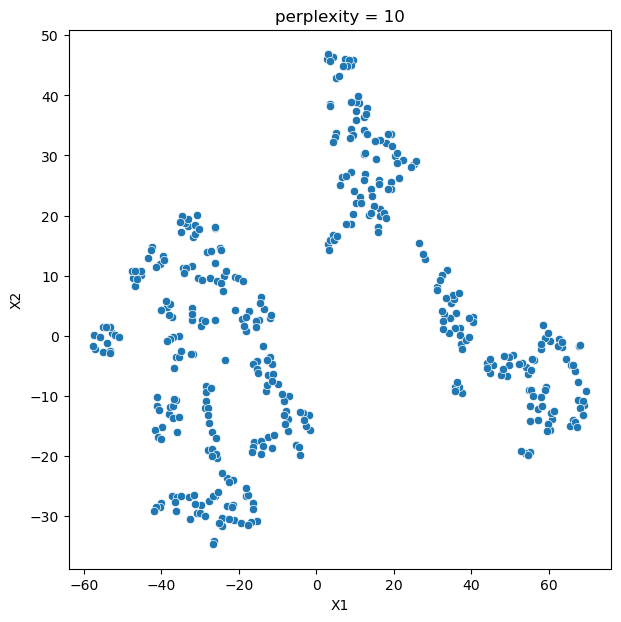

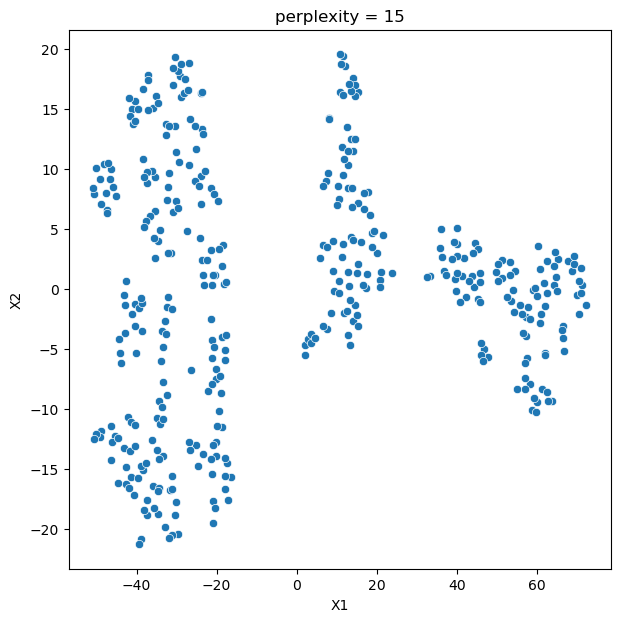

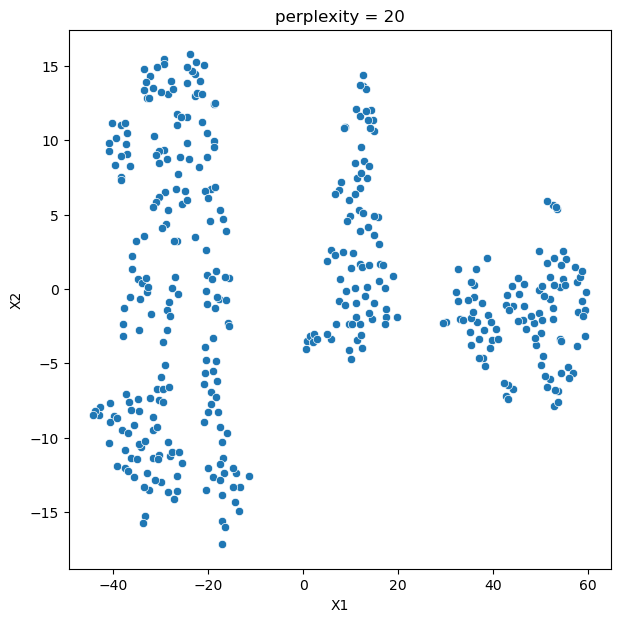

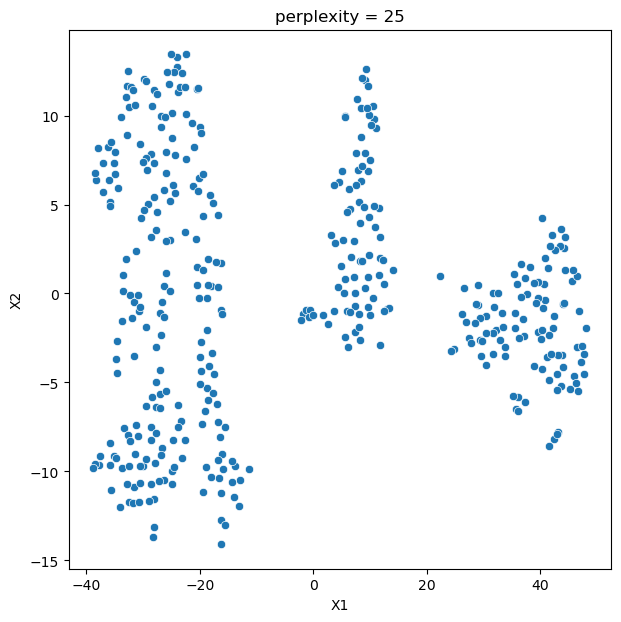

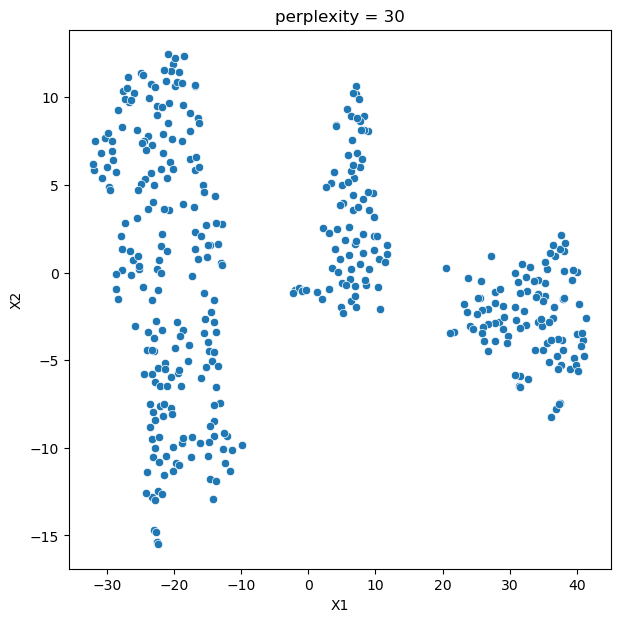

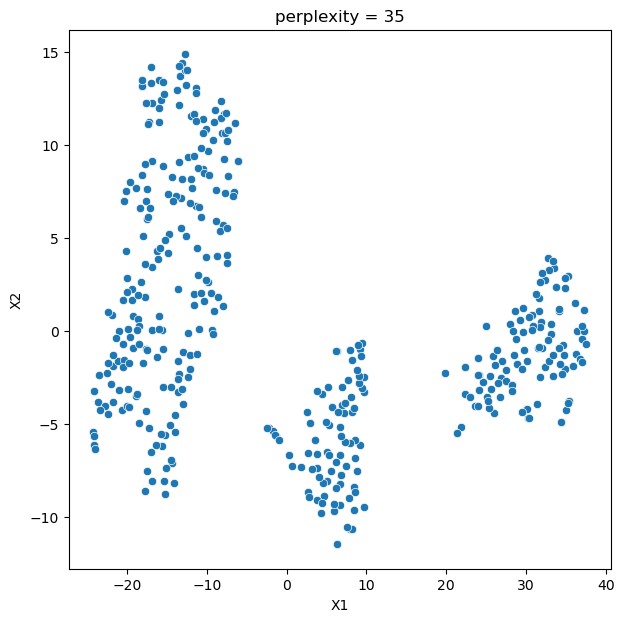

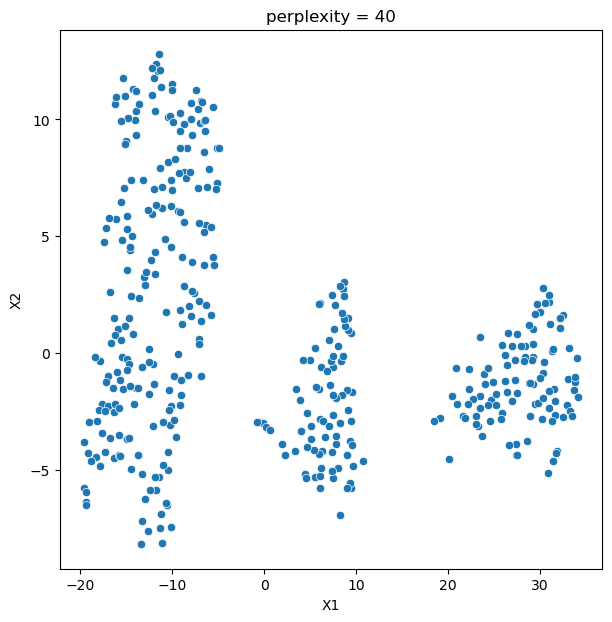

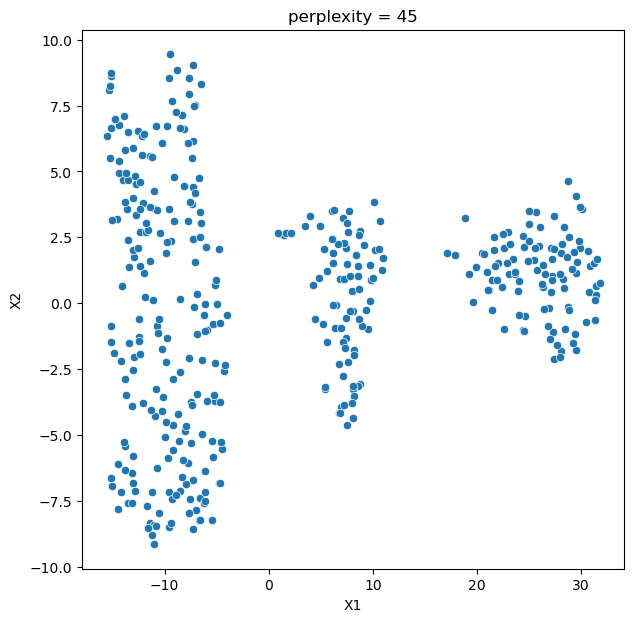

In [142]:
# Plot t-SNE chart with different perplexity.
for i in range(10, 50, 5):
    # Apply the t-SNE algorithm with random_state = 1
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
    # Fit and transform the t-SNE function on scaled data.
    data_tsne = pd.DataFrame(tsne.fit_transform(data_scaled))
    # Set column names.
    data_tsne.columns = ['X1', 'X2']
    # Set figure size.
    plt.figure(figsize = (7,7))
    # Draw a scatter plot of t-SNE data.
    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
    # Set the graph title.
    plt.title("perplexity = {}".format(i))

**Observations:the data can be grouped into three with a perplexity of 15 or more,** and there is no significant difference between those perplexities. Since the observation number is smaller than 500, the smallest effective perplexity (15) is chosen.

#### **Visualize the clusters w.r.t different variables using scatter plot and box plot**

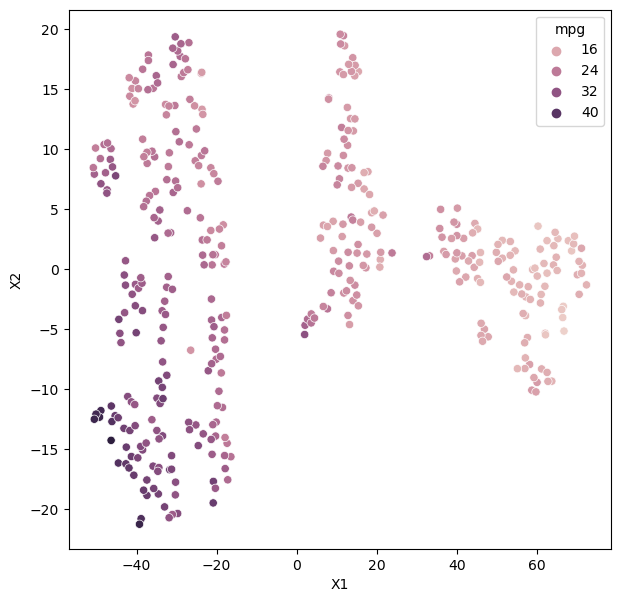

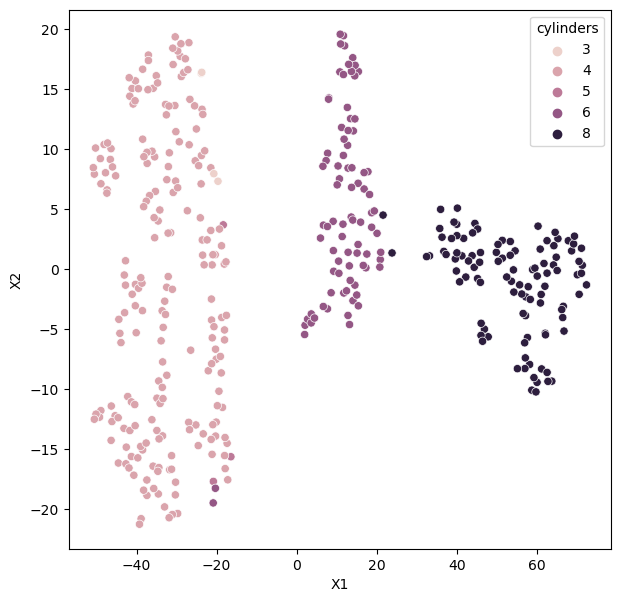

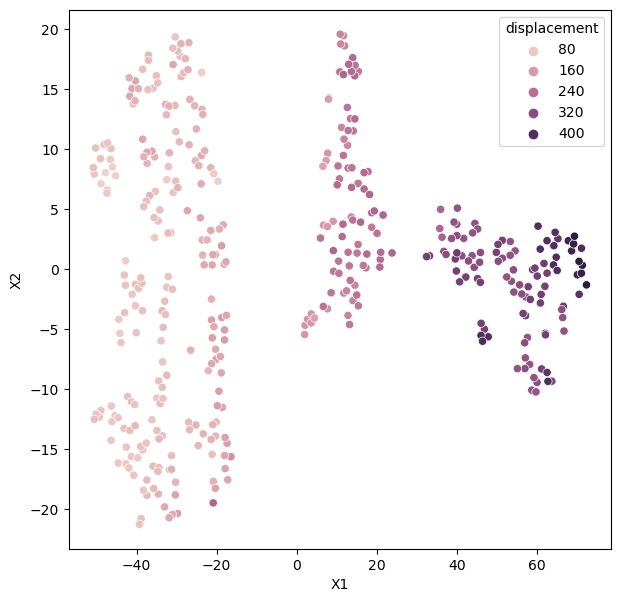

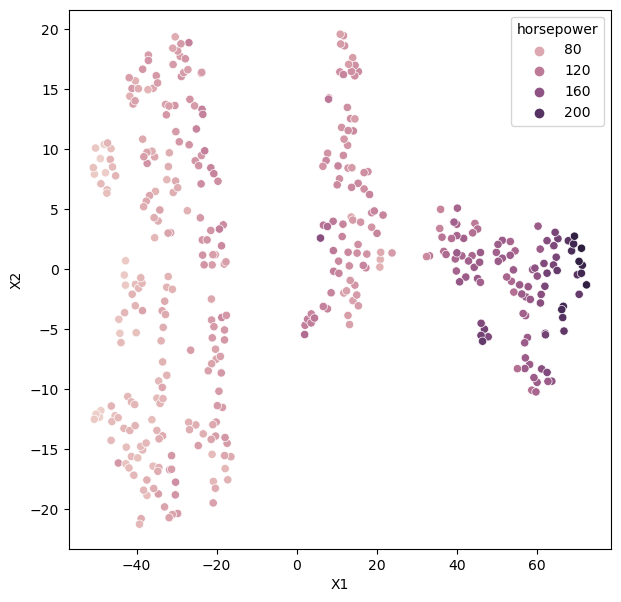

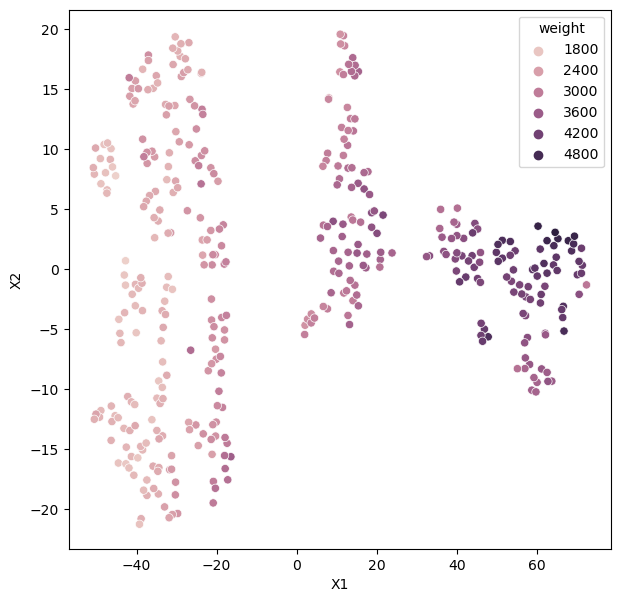

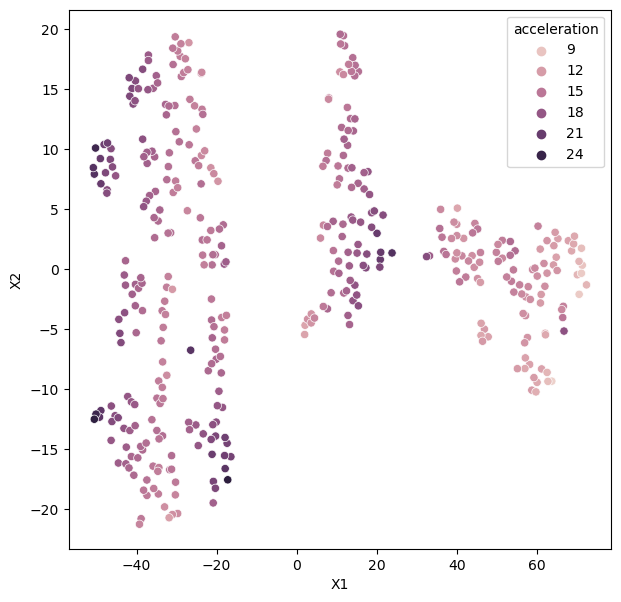

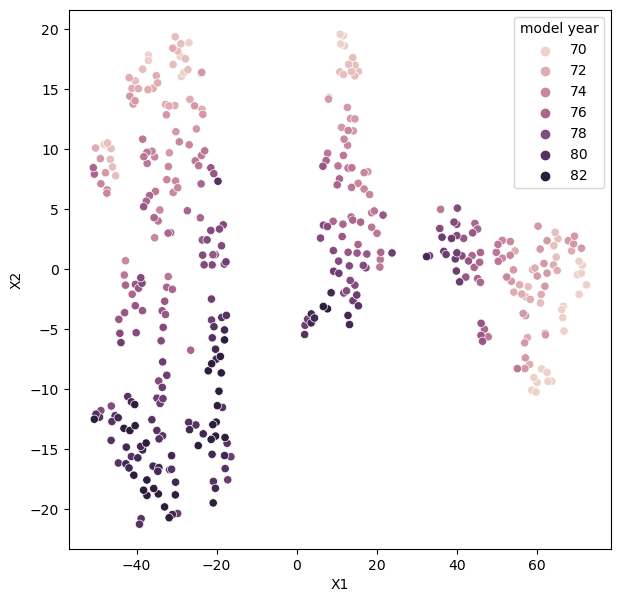

In [145]:
for col in data.columns:
    # Apply the t-SNE algorithm with random_state = 1, and perplexity = 15.
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = 15)
    # Fit and transform the t-SNE function on scaled data.
    data_tsne = pd.DataFrame(tsne.fit_transform(data_scaled))
    # Set column names.
    data_tsne.columns = ['X1', 'X2']
    # Set figure size.
    plt.figure(figsize = (7,7))
    # Draw a scatter plot of t-SNE data data w.r.t number of cylinders.
    sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data[col])

**Observations**

- cylinders, displacement, horsepower, weight, mpg, and acceleration show an overall grouping of the data. However, cylinders give the best grouping, while the rest do not provide an exclusive group. This indicates cylinder number is the dominant factor that affects other parameters.
- Year does not give a clear grouping. This indicates the model year is not the most important for purchase decision.

**Validate the success of grouping.**

/var/folders/59/zf38w4516fx1wscltrv8_b9w0000gn/T/ipykernel_10519/3703618899.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_component = x[0]
/var/folders/59/zf38w4516fx1wscltrv8_b9w0000gn/T/ipykernel_10519/3703618899.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  second_component = x[1]


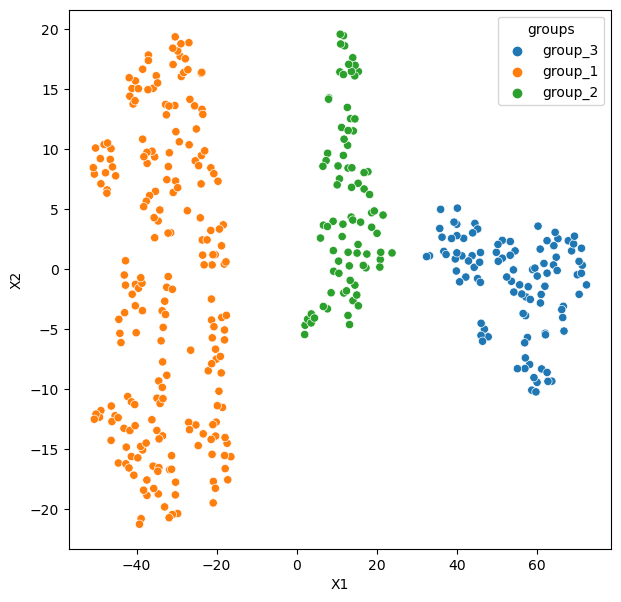

In [148]:
def group_tsne(x):
    """
    Group the scattered data points by visual separation along x and y axes.

    Parameters
    ----------
    x : pandas.core.series.Series
        t-SNE data set.

    Returns
    -------
    str
        group_[number].

    """
    # Subtract the first two components.
    first_component = x[0]
    second_component = x[1]
    # First, group the left data points (first component < -15).
    if first_component < -15:
        return 'group_1'
    # Second, group the middle data points (-17 < first component < 25).
    elif first_component < 25:
        return 'group_2'
    # Third, group the right data points (first component > 25). 
    else: 
        return 'group_3'

# Apply the group function to t-SNE data set.
data_tsne['groups'] = data_tsne.apply(group_tsne, axis = 1)
# Set figure size.
plt.figure(figsize = (7, 7))
# Draw a scatter plot for two components with hue.
sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne, hue = 'groups')
# Label x-axis.
plt.xlabel("X1")
# Label y-axis.
plt.ylabel("X2")
# Display the plot.
plt.show()

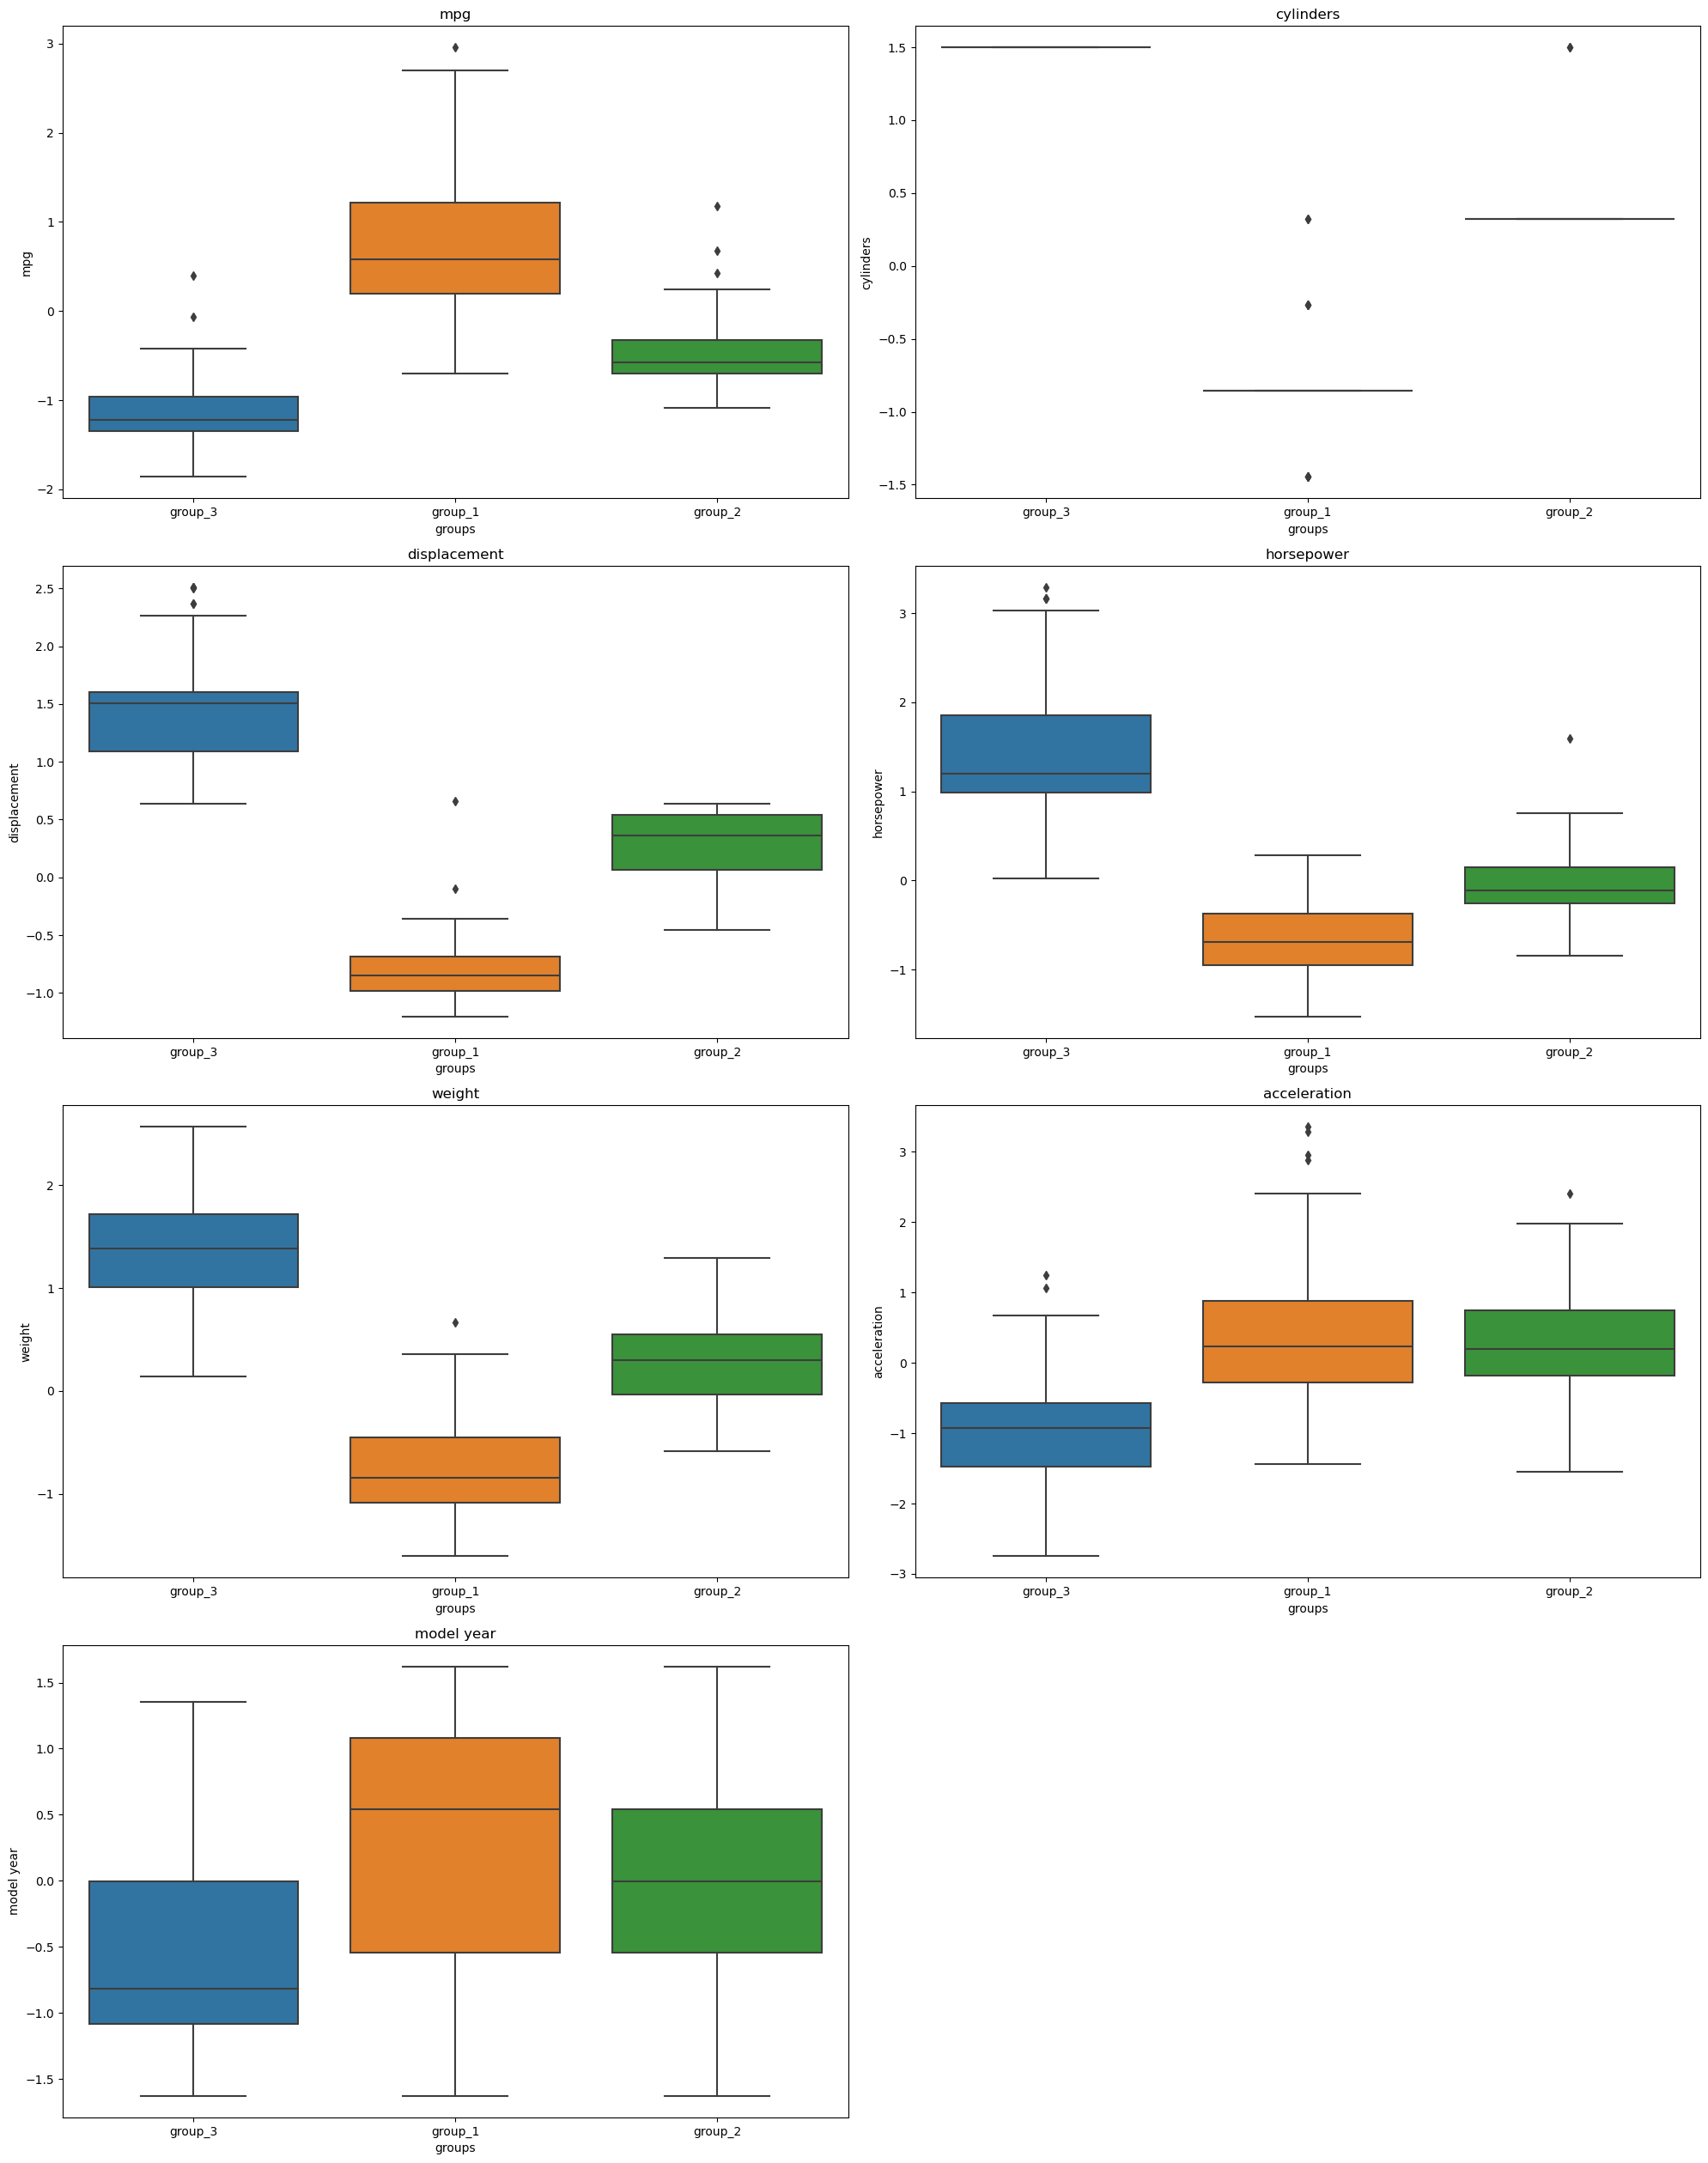

In [149]:
# Get a list of all columns.
all_col = data_scaled.columns.tolist()
# Set figure size.
plt.figure(figsize = (20, 50))
# Get the index and name (variable) of every column.
for i, variable in enumerate(all_col):
    # Set subplot size and position.
    plt.subplot(8, 2, i + 1)
    # Draw a box plot for group and variable.
    sns.boxplot(y=data_scaled[variable], x=data_tsne['groups'])
    # Set a tight layout.
    plt.tight_layout()
    # Set the title.
    plt.title(variable)
# Display the plot.
plt.show()

**Observations:**

- Group 1 represents cars with fewer cylinders (displacement/ horsepower/ weight), and higher mpg. Acceleration of those car are certainly not low, but the majority of the acceleration is in the middle. There are slightly more recent car models, but there is no clear pattern. **Group 1 has the most data**.
- Group 2 represents cars with more cylinders, and slightly lower mpg, displacement, and horsepower. Weight and accerleration are mostly at the middle level. There is no clear pattern of model year; it is evenly distributed.
- Group 3 represents cars with the most cylinders whose weight, displacement, horsepower are on the higher end. Those cars' acceleration are on the lower end. Model year spread out through the measurement, but they are mainly older cars.
- The conclusion is very similar to PCA: economic cars have more sales. Although the preference of year is not too clear among the best sellers, higher performance cars do have more old models. That implies a similar message as PCA.
- There are a smaller customer group that prefer high functioning vintage cars, and they seem to prefer older version. That could be because of nostalgia.
- **So the retailer should focus on newer economic (lower performance requirement) models**.

 ## **Actionable Insights and Recommendations**

**write your insights and recommendations here:**

- The retailer should focus on newer economic (lower performance requirement) models.
- For high performance vintage car market, prepare a smaller stock. And a good portion of the stock should be older models.